<a href="https://colab.research.google.com/github/mahaveer-rulaniya/competitions-and-hackathons/blob/main/KaggleChiSq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [4]:
df.head()

,Unnamed: 0,type,time,dayofweek,models,params,queuelen,trials,duration
0,1178,9.0,0.413889,3.0,21.0,535.0,0.0,40.0,0.0
1,877,9.0,0.643056,5.0,9.0,2682.0,0.0,40.0,0.0
2,4233,13.0,0.607639,4.0,32.0,3305.0,0.0,40.0,0.0
3,4134,8.0,0.643750,4.0,3.0,22023.0,0.0,40.0,0.0
4,3598,12.0,0.519444,3.0,8.0,3707.0,0.0,40.0,0.0


In [5]:
df = df.drop('Unnamed: 0', axis = 1)


In [6]:
id = test_df['Unnamed: 0']

In [7]:
test_df = test_df.drop('Unnamed: 0', axis = 1)

In [8]:
df.head()

,type,time,dayofweek,models,params,queuelen,trials,duration
0,9.0,0.413889,3.0,21.0,535.0,0.0,40.0,0.0
1,9.0,0.643056,5.0,9.0,2682.0,0.0,40.0,0.0
2,13.0,0.607639,4.0,32.0,3305.0,0.0,40.0,0.0
3,8.0,0.643750,4.0,3.0,22023.0,0.0,40.0,0.0
4,12.0,0.519444,3.0,8.0,3707.0,0.0,40.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   type       3104 non-null   float64
 1   time       3464 non-null   float64
 2   dayofweek  3464 non-null   float64
 3   models     3464 non-null   float64
 4   params     3191 non-null   float64
 5   queuelen   3464 non-null   float64
 6   trials     3464 non-null   float64
 7   duration   3464 non-null   float64
dtypes: float64(8)
memory usage: 216.6 KB


In [10]:
df.describe()

,type,time,dayofweek,models,params,queuelen,trials,duration
count,3104.000000,3464.000000,3464.000000,3464.000000,3191.000000,3464.000000,3464.000000,3464.000000
mean,9.253222,0.571791,3.246536,82.018764,10834.270762,54.402425,58.599018,0.731236
std,3.642100,0.166895,1.571793,1901.719969,25712.079591,354.209141,68.524295,0.894489
min,0.000000,0.000694,1.000000,1.000000,71.000000,0.000000,5.000000,0.000000
25%,7.000000,0.455556,2.000000,5.000000,957.500000,0.000000,40.000000,0.000000
50%,9.000000,0.584375,3.000000,13.000000,3026.000000,0.000000,40.000000,0.000000
75%,13.000000,0.690972,5.000000,26.000000,6977.000000,0.000000,40.000000,1.000000
max,14.000000,0.991667,7.000000,87293.000000,396701.000000,5547.000000,400.000000,3.000000


In [11]:
df.isnull().sum()

type         360
time           0
dayofweek      0
models         0
params       273
queuelen       0
trials         0
duration       0
dtype: int64

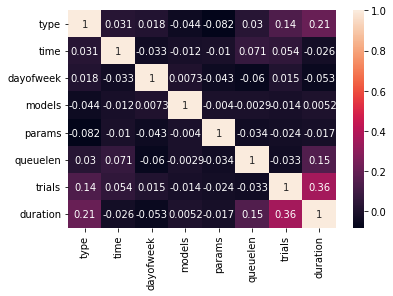

In [12]:
sns.heatmap(df.corr() , annot=True)

In [13]:
df.duration.unique()

array([0., 1., 3., 2.])

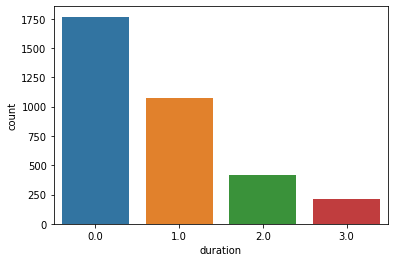

In [14]:
sns.countplot(x = df['duration'])

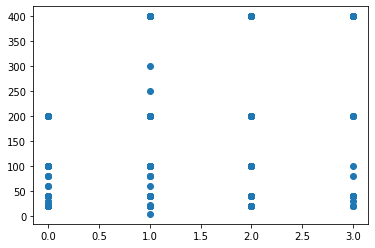

In [15]:
plt.scatter(x = df.duration , y = df.trials)

In [16]:
#sns.pairplot(df)

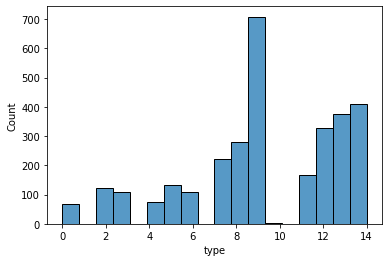

In [17]:
sns.histplot(df['type'])

(array([2.632e+03, 2.210e+02, 1.070e+02, 6.700e+01, 5.000e+01, 3.000e+01,
        2.200e+01, 1.800e+01, 1.100e+01, 8.000e+00, 2.000e+00, 6.000e+00,
        5.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([7.10000e+01, 1.32920e+04, 2.65130e+04, 3.97340e+04, 5.29550e+04,
        6.61760e+04, 7.93970e+04, 9.26180e+04, 1.05839e+05, 1.19060e+05,
        1.32281e+05, 1.45502e+05, 1.58723e+05, 1.71944e+05, 1.85165e+05,
        1.98386e+05, 2.11607e+05, 2.24828e+05, 2.38049e+05, 2.51270e+05,
        2.64491e+05, 2.77712e+05, 2.90933e+05, 3.04154e+05, 3.17375e+05,
        3.30596e+05, 3.43817e+05, 3.57038e+05, 3.70259e+05, 3.83480e+05,
        3.96701e+05]),
 <a list of 30 Patch objects>)

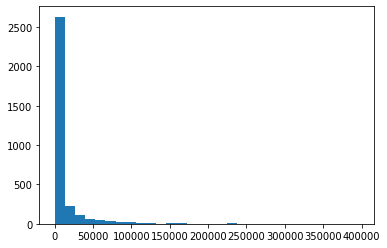

In [18]:
plt.hist(df['params'],30)

In [19]:
test_df.isnull().sum()

type         66
time          0
dayofweek     0
models        0
params       69
queuelen      0
trials        0
dtype: int64

In [20]:
df['type']= df['type'].fillna(round(df['type'].median()))
test_df['type']=test_df['type'].fillna(round(test_df['type'].median()))

In [21]:
df['params'] = df['params'].fillna(df['params'].median())
test_df['params'] = test_df['params'].fillna(test_df['params'].median())

In [22]:
df.head()

,type,time,dayofweek,models,params,queuelen,trials,duration
0,9.0,0.413889,3.0,21.0,535.0,0.0,40.0,0.0
1,9.0,0.643056,5.0,9.0,2682.0,0.0,40.0,0.0
2,13.0,0.607639,4.0,32.0,3305.0,0.0,40.0,0.0
3,8.0,0.643750,4.0,3.0,22023.0,0.0,40.0,0.0
4,12.0,0.519444,3.0,8.0,3707.0,0.0,40.0,0.0


In [23]:
y_train = df['duration']
X_train = df.drop('duration', axis = 1)
X_test = test_df

In [24]:
X_test.head()

,type,time,dayofweek,models,params,queuelen,trials
0,9.0,0.590972,2.0,13.0,4615.0,0.0,40.0
1,9.0,0.545833,7.0,33.0,552.0,0.0,40.0
2,14.0,0.510417,3.0,2.0,2890.0,0.0,40.0
3,9.0,0.518056,3.0,9.0,1126.0,0.0,40.0
4,11.0,0.376389,2.0,23.0,47164.0,0.0,40.0


In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
xgb = GradientBoostingClassifier(n_estimators=500, max_depth= 6).fit(X_train_scaled, y_train)

In [28]:
y_pred = xgb.predict(X_test_scaled)

In [29]:
y_output = pd.Series(y_pred).astype(int)

In [30]:
data = {'ID': id , 'duration': y_output}

In [31]:
output = pd.concat(data, axis = 1)

In [32]:
output.head()

,ID,duration
0,2439,1
1,1213,1
2,2659,1
3,17,0
4,3800,0


In [33]:
output.to_csv('submission.csv', index = False)

In [34]:
output.shape

(867, 2)

In [35]:
# y = df['duration']
# X = df.drop('duration' , axis = 1)

In [36]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

In [37]:
# X_train , X_test , y_train, y_test = train_test_split(X, y , random_state=43)

In [38]:
# X_train.head()

In [39]:
# scaler=StandardScaler()

In [40]:
# X_train_scaled=scaler.fit_transform(X_train)
# X_test_scaled=scaler.transform(X_test)


In [41]:
# from sklearn.ensemble import GradientBoostingClassifier

In [42]:
# xgb = GradientBoostingClassifier(n_estimators=500, max_depth= 5).fit(X_train_scaled, y_train)

In [43]:
# y_pred = xgb.predict(X_test_scaled)

In [44]:
# from sklearn.metrics import f1_score
# print(f1_score(y_test, y_pred , average='weighted'))

In [45]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

In [46]:
# from sklearn.ensemble import RandomForestClassifier

In [47]:
# rm = RandomForestClassifier().fit(X_train_scaled, y_train)

In [48]:
# rm_pred = rm.predict(X_test_scaled)

In [49]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))